# 품질보증 시스템

## 문제
품질관리는 모든 제조업에서 매우 중요합니다. 이것은 대량의 강판을 생산하는 제조 산업에 특히 해당됩니다. 강판 결함이란 무엇일까요? 결함은 관찰된 변수 또는 프로세스와 관련된 계산된 매개변수의 허용 가능한 범위 밖에 있는 값입니다. 
예를 들어 두께가 10cm이고 오차 범위가 ±2cm인 강판을 사용하는 것이 허용됩니다. 따라서 두께가 8.0cm에서 12.0cm 사이인 경우 강판을 사용할 수 있습니다. 단, 두께가 7.5cm인 경우에는 허용되지 않습니다.

오류는 장비 고장, 센서성능 저하 또는 프로세스 장애로 인한 비정상적인 프로세스 동작으로도 정의됩니다. 예를 들어 강판의 흠집은 결함입니다.

당신은 강판 제조 회사에서 일하고 있습니다.
당신의 팀은 지속적으로 품질이 저하되고 있으며, 강철판 결함이 많습니다. 철판 결함을 하나하나 확인하는 데 많은 비용과 인력, 시간이 소요됩니다.
상사가 결함을 자동으로 찾을 수 있는 방법을 알아봐 주길 원합니다. 회사에 도움이 될 생산 품질 데이터가 있습니다.

## 데이터
본 강의에서는 [Dataset]_Module8_(Quality).csv 파일을 사용하여 실험을 진행하겠습니다.

## 0. 머신러닝 패키지 준비

### 0.1 필요한 패키지 설치

In [1]:
pip install flaml[notebook] --quiet

### 0.2 라이브러리 패키지 불러오기
이 단계는 필요에 따라 적절한 시점까지 미룰 수 있음

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import flaml

## 1. 데이터집합 로드
Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.Pandas의 read_csv() 함수를 사용하여 CSV(Comma-Separated Values) 형식의 파일을 손쉽게 로드할 수 있습니다.

In [3]:
data = pd.read_csv('[Dataset]_Module8_(Quality).csv')
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_Types
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [4]:
data.shape

(1941, 28)

In [5]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Fault_Types'],
      dtype='object')

## 2. 데이터 탐색 (Exploratory Data Analysis, EDA)

In [6]:
# 데이터집합의 통계적 특성 조회
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [7]:
# 목표 열인 Fault_Types의 고유값 확인
data['Fault_Types'].unique()

array(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], dtype=object)

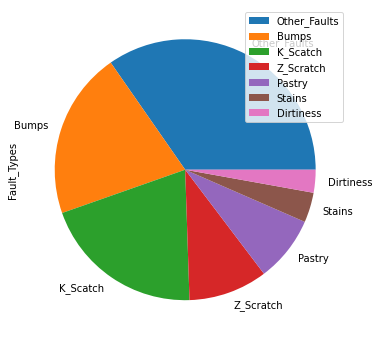

In [8]:
# Fault_Types 열의 분포 확인
plt.figure(figsize=(6, 6))
data['Fault_Types'].value_counts().plot.pie(legend=True)

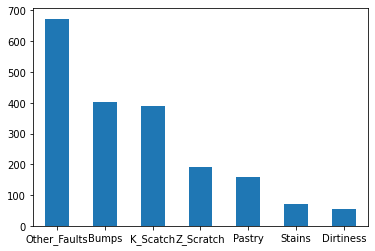

In [9]:
# Fault_Types 열의 분포 확인
data['Fault_Types'].value_counts().plot.bar(rot=0)

## 3. 데이터 준비와 분할

In [10]:
# feature와 label로 구분
X = data.drop(['Fault_Types'], axis=1)
y = data.Fault_Types

In [11]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, test_size=0.2, random_state=1)

## 4. 분류기 모델 생성

In [12]:
# AutoML 도구인 FLAML을 사용하여 최적 모델 자동 판별
aml = flaml.AutoML()
aml.fit(X_train, y_train, task="classification")

[flaml.automl: 08-01 03:01:21] {2444} INFO - task = classification
[flaml.automl: 08-01 03:01:21] {2446} INFO - Data split method: stratified
[flaml.automl: 08-01 03:01:21] {2449} INFO - Evaluation method: holdout
[flaml.automl: 08-01 03:01:21] {2568} INFO - Minimizing error metric: log_loss
[flaml.automl: 08-01 03:01:21] {2617} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 08-01 03:01:21] {160} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 08-01 03:01:21] {160} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 08-01 03:01:21] {2708} INFO - List of ML learners in AutoML Run: ['extra_tree', 'lgbm', 'rf', 'catboost', 'xgboost', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 08-01 03:01:21] {30

## 5. 평가

In [13]:
y_pred = aml.predict(X_test)
y_pred[:20]

array(['Bumps', 'K_Scatch', 'Bumps', 'Other_Faults', 'Other_Faults',
       'Bumps', 'Bumps', 'Z_Scratch', 'Other_Faults', 'Other_Faults',
       'Pastry', 'Pastry', 'Other_Faults', 'Other_Faults', 'K_Scatch',
       'K_Scatch', 'Z_Scratch', 'Bumps', 'K_Scatch', 'Other_Faults'],
      dtype=object)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.63      0.62      0.62        79
   Dirtiness       0.90      0.90      0.90        10
    K_Scatch       0.96      0.94      0.95        80
Other_Faults       0.72      0.75      0.73       138
      Pastry       0.76      0.66      0.70        29
      Stains       1.00      1.00      1.00        13
   Z_Scratch       0.93      0.93      0.93        40

    accuracy                           0.79       389
   macro avg       0.84      0.83      0.83       389
weighted avg       0.79      0.79      0.79       389



In [15]:
# 판별된 최적 알고리듬과 하이퍼매개변수
aml.best_estimator, aml.best_config

('lgbm',
 {'colsample_bytree': 0.3955693254372702,
  'learning_rate': 0.019316895546068795,
  'log_max_bin': 6,
  'min_child_samples': 53,
  'n_estimators': 320,
  'num_leaves': 24,
  'reg_alpha': 0.0013785083170001627,
  'reg_lambda': 0.04644365636517757})

## 6. 모델 설명 (Explainable AI, XAI)

<BarContainer object of 27 artists>

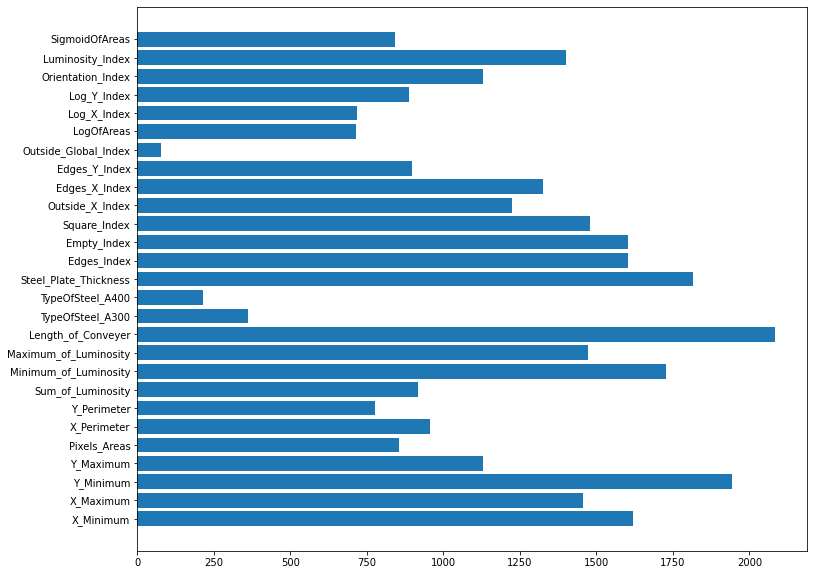

In [16]:
# 피처 중요도
plt.figure(figsize=(12, 10))
plt.barh(X.columns, aml.model.estimator.feature_importances_)

## 결론

이 실험에서는 다중 분류 문제의 사례인 강판 결함 판별에 인공 지능을 사용하는 방법의 예를 보았습니다.